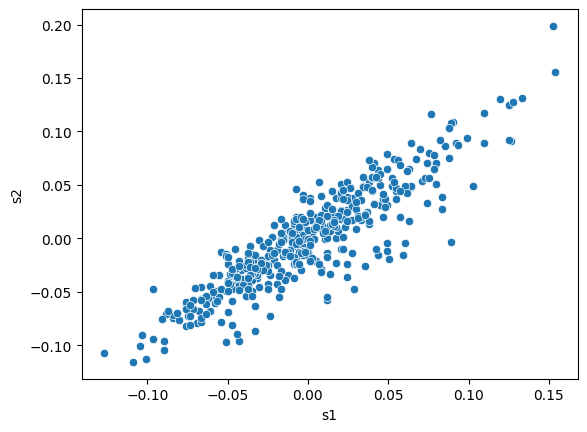

In [6]:
from sklearn.datasets import load_diabetes 
import seaborn as sns
import matplotlib.pyplot as plt

#Load data set
df=load_diabetes(as_frame=True).data[['s1','s2']]

#PLot data
plt.figure()
sns.scatterplot(data=df,x='s1',y='s2')
plt.show()
plt.close()

In [7]:
from sklearn.linear_model import LinearRegression

#model inputs: (n_samples,n_features)

X=df['s1'].values.reshape(-1,1)  #create a 2D array
y=df['s2'].values

#Now have data in the desired shape
#Fit and predict
simple_model=LinearRegression()
simple_model.fit(X,y)
y_pred=simple_model.predict(X)


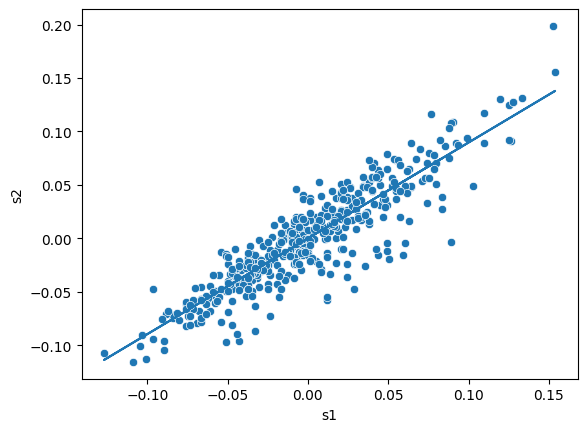

In [8]:
#plot
plt.figure()
sns.scatterplot(data=df,x='s1',y='s2')
plt.plot(X,y_pred)
plt.show()
plt.close()

### Example 2: TV

In [9]:
#Load data set
import pandas as pd

data=pd.read_csv("Advertising.csv",index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [10]:
# Select and reshape data
x=data.iloc[:,0].values
y=data.iloc[:,3].values

y=y.reshape(-1,1)
x=x.reshape(-1,1)


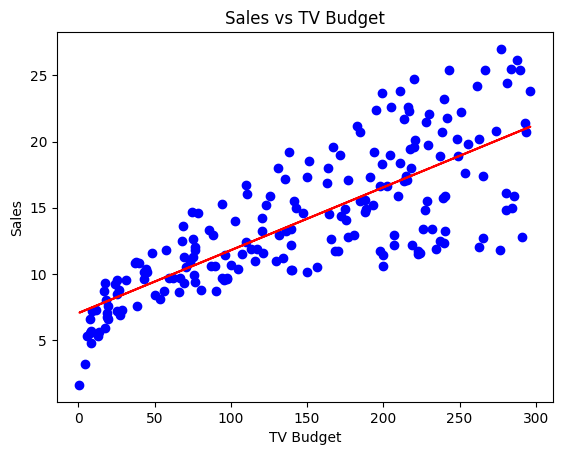

In [11]:
# Create an empty linear regression model
tv_model = LinearRegression()

# Create the model using fit(x,y)
tv_model.fit(x,y)

# Use model to make a prediction
y_pred = tv_model.predict(x)

# Plot model and data
plt.scatter(x,y,color = 'b')
plt.plot(x,tv_model.predict(x),color = 'r')
plt.title('Sales vs TV Budget')
plt.xlabel('TV Budget')
plt.ylabel('Sales')
plt.show()


In [12]:
# TV model coefficients
print('Coefficients: \n', tv_model.coef_)

Coefficients: 
 [[0.04753664]]


## Radio Simple Linear Model

In [ ]:
# Select and reshape data
x = data.iloc[:,1].values
y = data.iloc[:,3].values
y=y.reshape(-1, 1)
x=x.reshape(-1, 1)

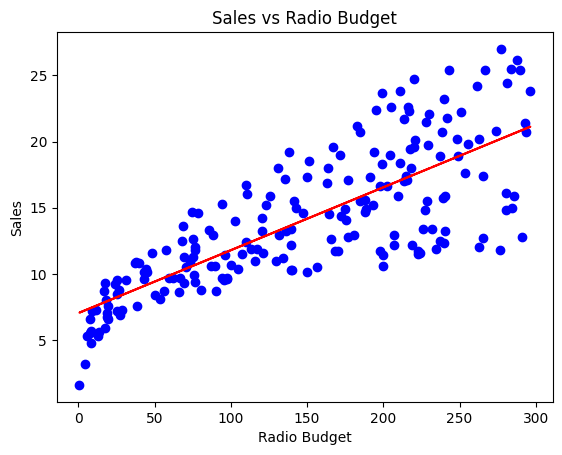

In [13]:
# Create an empty linear regression model
radio_model = LinearRegression()

# Create the model using fit(x,y)
radio_model.fit(x,y)

# Use model to make a prediction
y_pred = radio_model.predict(x)

# Plot model and data
plt.scatter(x,y,color = 'b')
plt.plot(x,radio_model.predict(x),color = 'r')
plt.title('Sales vs Radio Budget')
plt.xlabel('Radio Budget')
plt.ylabel('Sales')
plt.show()


In [14]:
# Radio model coefficients
print('Coefficients: \n', radio_model.coef_)


Coefficients: 
 [[0.04753664]]


## Multiple Linear Regression

In [15]:
X = data.iloc[:,[0, 1, 2]].values
X[1:4]

array([[ 44.5,  39.3,  45.1],
       [ 17.2,  45.9,  69.3],
       [151.5,  41.3,  58.5]])

In [17]:
# Select and reshape data
y = data.iloc[:,3].values
y = y.reshape(-1, 1)
X = X.reshape(-1, X.shape[1])  #width

# Create an empty linear regression model
advertising_model = LinearRegression()

# Create the model using fit(X,y)
advertising_model.fit(X,y)

# Get intercept and coefficients
print('Intercept: \n', advertising_model.intercept_)
print('Coefficients: \n', advertising_model.coef_)


Intercept: 
 [2.93888937]
Coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]


### Trainig and testing samples

In [19]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets
rseed = 23 # Use the same random seed for learning purposes to get the same result
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,  random_state=rseed)

print ("Training data:",X_train.shape, y_train.shape)
print ("Test data:",X_test.shape, y_test.shape)

Training data: (150, 3) (150, 1)
Test data: (50, 3) (50, 1)


### Feature Scaling:

Recall feature scaling is the process of manipulating feature values so that they all fall within a similar range. If you have one feature being anywhere between 0-1000 and another feature being anywhere from 0-0.1, then you have a scaling issue. The first feature would naturally be prioritised, as it contributes the most to error.

Therefore,... want to ensure that all features are on the same scale. This is the process of feature scaling. Two ways: : normalisation, or standardisation.

Standardisation: 
- a type of scaling that will shift your values to have a mean of 0 and a standard deviation of 1. This way, most of your features will be between -1 and 1. 
- However, it is possible for some outliers to go a bit higher. Standardisation is a great form of feature scaling, but works best with features that follow a Gaussian (normal) distribution.

Normalisation
- is simply the process of (a) subtracting the minimum value of the dataset and (b) dividing by the range of the dataset (which is max - min). This ensures that the smallest value is always 0 and the largest value is always 1. 
- This is less optimal than standardisation, but doesn't require data to be a Gaussian.


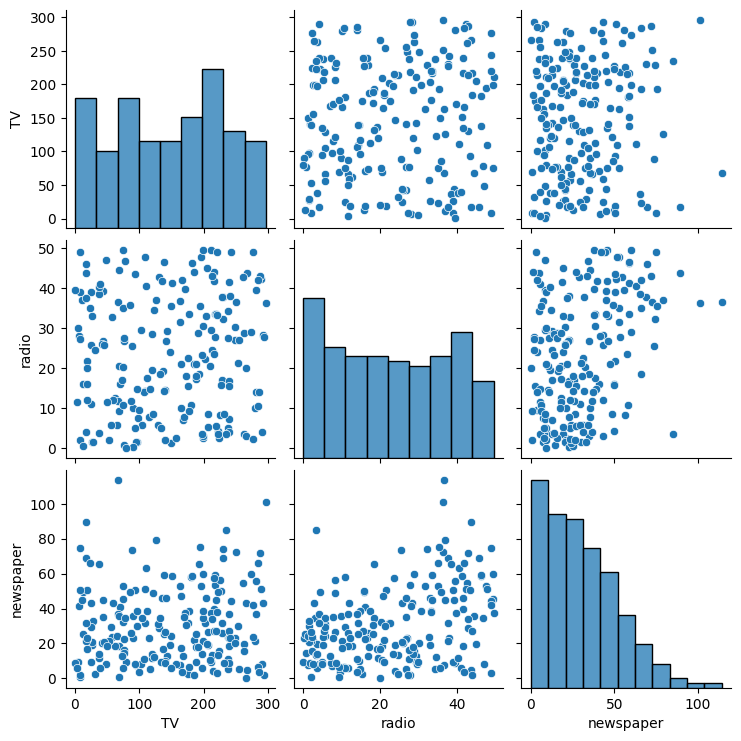

In [20]:
# Plot the distribution of the data
sns.pairplot(data=data.drop('sales', axis=1))


features don't follow a Gaussian distribution. Therefire, normalise our data using `MinMaxScaler`. Note that fit it on the training set

In [21]:
from sklearn.preprocessing import MinMaxScaler

# Fit the scaler onn the train data
sc=MinMaxScaler()
sc.fit(X_train)

# Apply the scaler on train and test data
X_train = sc.transform(X_train)    # what's the differece between fit() and transform(?)
X_test = sc.transform(X_test)


### Fit the model on the training data


In [24]:
import numpy as np

# Fit a model
lm = LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

# Create line coordinates
X_line = np.empty(X_test.shape)               # what's np.empty?
for i in range(X_test.shape[1]):
    X_line[:, i] = np.linspace(np.min(X_test[:,i]), np.max(X_test[:,i]), num=X_test.shape[0])
y_line = lm.predict(X_line)

print('Intercept: \n', lm.intercept_)
print('Coefficients: \n', lm.coef_)


Intercept: 
 [3.03123996]
Coefficients: 
 [[13.45518042  8.82700262  0.19358528]]


In [25]:
# Predictions
predictions[0:5]


array([[10.15914647],
       [21.58406999],
       [18.62679322],
       [13.65075552],
       [18.3315086 ]])

In [ ]:
## Plot the errors
fig, ax = plt.subplots(1, X_test.shape[1], sharey=True, sharex=True, figsize=(8,2))
fig.suptitle("Y vs X on Each Dimension")
ax[0].set_ylabel(data.columns[3])

# Get values for the error bar
error_bar_values = np.abs((y_test-predictions)[:,0])

# Plot data, predicted values, and error bars
for i in range(X_test.shape[1]):
    ax[i].errorbar(X_test[:, i], y_test[:, 0], yerr=error_bar_values, fmt='.k', ecolor='red', label='True')
    ax[i].scatter(X_test[:,i], predictions[:,0], c='b', marker='.', label='Predicted')
    ax[i].legend(loc='best', fontsize='x-small')

- The red lines indicate the error of the prediction from the actual observations. 
- The black dots represent true values, and the blue dots represent predicted values. 
- At the end of the red lines, either at the top or bottom, is a blue dot. i.e. you can read the red error line as the distance deviated from the true values. 
- The reason why there is a red line either side of the black dot is to show that the error may be within that line, either above or below.

In [26]:
# R squared score
print ("R2 Score:", round (model.score(X_test, y_test), 4))


R2 Score: 0.9197


This score is quite close to 1, which suggests that the model fits our observations quite well.